# Textual Anomaly Detection in Financial Reports

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [7]:
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(28481, 31)

In [8]:
# Checking the missing values 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


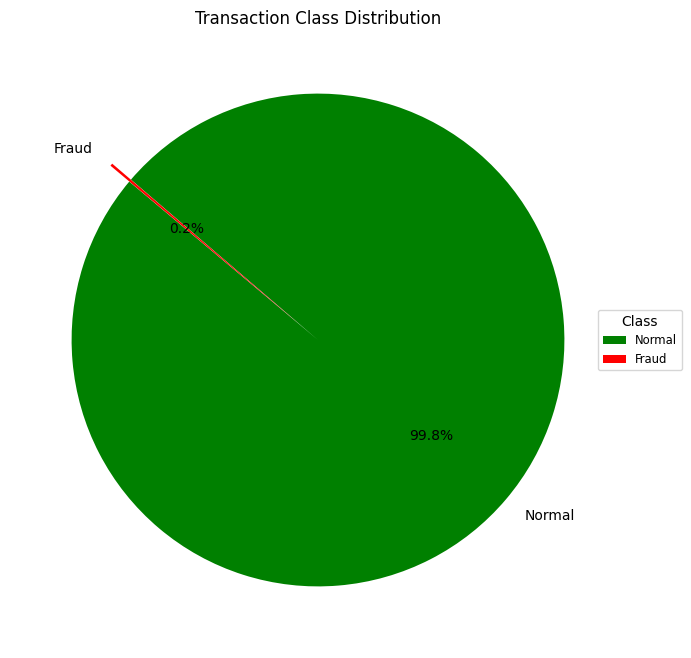

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Class': ['Normal', 'Fraud'], 'Count': [284315, 492]}
df = pd.DataFrame(data)

# Plotting the pie chart with count in the legend
plt.figure(figsize=(8, 8))
colors = ['green', 'red']
explode = (0, 0.1)  # Explode the second slice (Fraud) for emphasis
plt.pie(df['Count'], labels=df['Class'], colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title("Transaction Class Distribution")
plt.legend(title="Class", loc="right", fontsize='small', bbox_to_anchor=(1.1, 0.5))
plt.show()


In [11]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('creditcard_data.csv')



# Check the column names
print(data.columns)



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
# Assuming 'Class' is the correct column name
Normal = data[data['Class'] == 0]
Fraud = data[data['Class'] == 1]

In [13]:
Normal.shape

(284314, 31)

In [14]:
Fraud.shape

(492, 31)

In [15]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

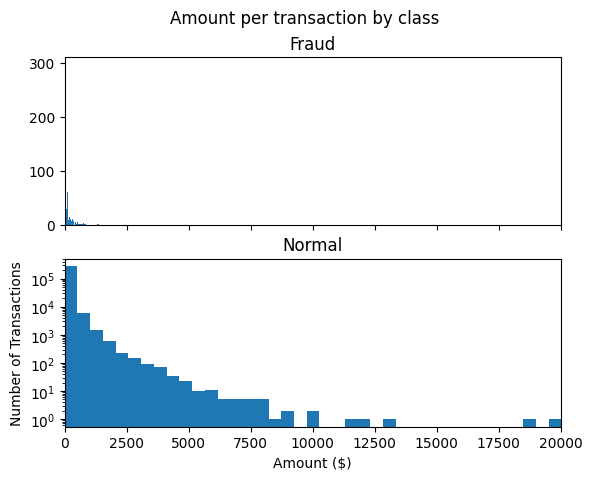

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [17]:

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the Autoencoder model for anomaly detection
class LSTMAAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, encoding_dim)
        self.decoder = nn.Linear(encoding_dim, input_dim)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = torch.sigmoid(self.decoder(x))
        return x


In [18]:
import torch
import torch.nn as nn
from torchsummary import summary

# Define the Autoencoder model for anomaly detection
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(LSTMAutoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, encoding_dim)
        self.decoder = nn.Linear(encoding_dim, input_dim)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = torch.sigmoid(self.decoder(x))
        return x

# Set input dimension and encoding dimension
input_dim = X_train_tensor.shape[1] 
encoding_dim = 20  

# Create an instance of your LSTMAutoencoder model
autoencoder_model = LSTMAutoencoder(input_dim, encoding_dim)

# Print the model summary
summary(autoencoder_model, input_size=(input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             620
            Linear-2                   [-1, 30]             630
Total params: 1,250
Trainable params: 1,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [19]:
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(LSTMAutoencoder, self).__init__()
        self.encoder = nn.LSTM(input_dim, encoding_dim, batch_first=True)
        self.decoder = nn.LSTM(encoding_dim, input_dim, batch_first=True)

    def forward(self, x):
        x, _ = self.encoder(x)
        x, _ = self.decoder(x)
        return x

# Set hyperparameters
input_dim = X_train_tensor.shape[1]
encoding_dim = 20

# Initialize the model, loss function, and optimizer
model = LSTMAutoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
batch_size = 64
train_losses = []
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        batch = X_train_tensor[i:i + batch_size]
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
    train_losses.append(loss.item())
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Save the trained model
torch.save(model.state_dict(), 'credit_card_autoencoder_model_lstm.pth')


Epoch 1/10, Loss: 0.2685419023036957
Epoch 2/10, Loss: 0.2416672706604004
Epoch 3/10, Loss: 0.23319187760353088
Epoch 4/10, Loss: 0.22949640452861786
Epoch 5/10, Loss: 0.22761400043964386
Epoch 6/10, Loss: 0.22653833031654358
Epoch 7/10, Loss: 0.22450752556324005
Epoch 8/10, Loss: 0.22263659536838531
Epoch 9/10, Loss: 0.22042523324489594
Epoch 10/10, Loss: 0.21908827126026154


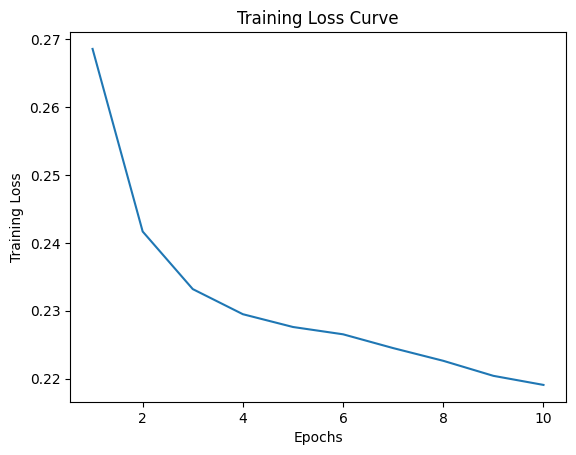

In [20]:
# Plotting the training loss curve
plt.plot(range(1, epochs + 1), train_losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

In [21]:
# Apply the trained model to detect anomalies in test data
model.eval()
with torch.no_grad():
    reconstructed = model(X_test_tensor)
    test_loss = criterion(reconstructed, X_test_tensor)
    print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.44762590527534485


In [22]:
from sklearn.metrics import classification_report
import numpy as np
import torch

# Convert tensors to numpy arrays
reconstructed_np = reconstructed.numpy()
X_test_np = X_test_tensor.numpy()

# Compute reconstruction errors
reconstruction_errors = np.mean(np.abs(reconstructed_np - X_test_np), axis=1)

# Define a threshold for anomaly detection and create labels
threshold = 0.5  # Example threshold, adjust according to your needs
y_pred = (reconstruction_errors > threshold).astype(int)
y_true = y_test_tensor.numpy().astype(int)  # Assuming y_test_tensor contains the true labels for the test data

# Rename labels for clarity
y_true = np.where(y_true == 0, 'Normal', 'Fraud')
y_pred = np.where(y_pred == 0, 'Normal', 'Fraud')

# Generate the classification report
print("Financal Classification Report-LTSM:")
print(classification_report(y_true, y_pred))


Financal Classification Report-LTSM:
              precision    recall  f1-score   support

       Fraud       0.02      0.89      0.03        95
      Normal       1.00      0.91      0.95     56867

    accuracy                           0.91     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [ ]:
# Anomaly detection on Test Dataset

In [28]:
# Calculate reconstruction errors for anomaly detection
reconstruction_errors = torch.mean((X_test_tensor - reconstructed)**2, dim=1)
mean_error = reconstruction_errors.mean().item()
std_error = reconstruction_errors.std().item()
threshold = mean_error + 2 * std_error  # Set the threshold for anomaly detection

# Create a new DataFrame to store the reconstruction errors
error_df = pd.DataFrame({'Reconstruction_Error': reconstruction_errors})

# Merge error_df with the original data on index to match rows
merged_data = data.merge(error_df, left_index=True, right_index=True)

# nomalies in the test data based on reconstruction errors
anomalies = merged_data[merged_data['Reconstruction_Error'] > threshold]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())


Number of anomalies detected: 512
      Time        V1        V2        V3        V4        V5        V6  \
0      0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
300  217.0 -2.421230 -1.369602  2.261281  2.011034  1.878525 -1.275607   
389  284.0  1.141436  0.081893  0.503625  1.487212 -0.473170 -0.411384   
459  336.0 -0.895224  0.562106  2.817524 -0.718734  0.223222  0.796156   
463  340.0  1.195494  0.194929  0.617510  0.649717 -0.474718 -0.716084   

           V7        V8        V9  ...       V22       V23       V24  \
0    0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928   
300 -1.251029  0.212619  0.142608  ...  0.157737 -0.624865  0.487156   
389 -0.053193  0.071036  0.553486  ... -0.150234  0.001322  0.369459   
459  0.464887 -0.002081  0.387537  ...  0.221249 -0.380422 -0.245721   
463 -0.027078 -0.073385  0.057251  ... -0.590119  0.210111  0.388014   

          V25       V26       V27       V28  Amount  Class  \
0    0.128539 -0.189115  0

# Deployment System

In [25]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display, clear_output

In [39]:
# Load and preprocess your data
data = pd.read_csv('creditcard_data.csv')
scaler = StandardScaler()
X = data.drop('Class', axis=1)
y = data['Class']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = torch.sigmoid(self.decoder(x))
        return x

input_size = X_train.shape[1]
hidden_size = 20
model = Autoencoder(input_size, hidden_size)

# Train the autoencoder model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, X_train_tensor)
    loss.backward()
    optimizer.step()

threshold = 0.01

detected_anomalies = []

def detect_anomalies(*args):
    output_widget.clear_output()

    # Get input data from widgets
    input_data = [widget.value for widget in input_widgets]
    input_df = pd.DataFrame([input_data], columns=X.columns)
    input_data_scaled = scaler.transform(input_df.values)
    input_tensor = torch.tensor(input_data_scaled, dtype=torch.float32)

    model.eval()
    with torch.no_grad():
        reconstructed = model(input_tensor)
        reconstruction_error = torch.mean((input_tensor - reconstructed)**2).item()

    with output_widget:
        if reconstruction_error > threshold:
            print('Anomaly Detected!')
            # Print the detected anomaly
            print('Detected Anomaly Data:')
            print(input_df)
            # Add the anomaly to the list of detected anomalies
            detected_anomalies.append(input_df)
        else:
            print('No Anomaly Detected')

# Create input widgets
input_widgets = [widgets.FloatText(description=col) for col in X.columns]

# Create button to detect anomalies
detect_button = widgets.Button(description='Detect Anomaly')
detect_button.on_click(detect_anomalies)

# Create output widget
output_widget = widgets.Output()

# Display widgets
display(*input_widgets, detect_button, output_widget)

# Function to display only the anomalies
def display_anomalies():
    clear_output()
    print("Detected Anomalies:")
    for anomaly in detected_anomalies:
        print(anomaly)

# Create a button to show anomalies
show_anomalies_button = widgets.Button(description='Show Anomalies')
show_anomalies_button.on_click(lambda b: display_anomalies())

# Display the button
display(show_anomalies_button)


FloatText(value=0.0, description='Time')

FloatText(value=0.0, description='V1')

FloatText(value=0.0, description='V2')

FloatText(value=0.0, description='V3')

FloatText(value=0.0, description='V4')

FloatText(value=0.0, description='V5')

FloatText(value=0.0, description='V6')

FloatText(value=0.0, description='V7')

FloatText(value=0.0, description='V8')

FloatText(value=0.0, description='V9')

FloatText(value=0.0, description='V10')

FloatText(value=0.0, description='V11')

FloatText(value=0.0, description='V12')

FloatText(value=0.0, description='V13')

FloatText(value=0.0, description='V14')

FloatText(value=0.0, description='V15')

FloatText(value=0.0, description='V16')

FloatText(value=0.0, description='V17')

FloatText(value=0.0, description='V18')

FloatText(value=0.0, description='V19')

FloatText(value=0.0, description='V20')

FloatText(value=0.0, description='V21')

FloatText(value=0.0, description='V22')

FloatText(value=0.0, description='V23')

FloatText(value=0.0, description='V24')

FloatText(value=0.0, description='V25')

FloatText(value=0.0, description='V26')

FloatText(value=0.0, description='V27')

FloatText(value=0.0, description='V28')

FloatText(value=0.0, description='Amount')

Button(description='Detect Anomaly', style=ButtonStyle())

Output()

Button(description='Show Anomalies', style=ButtonStyle())

# Model 2

In [28]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

In [29]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import re
import ipywidgets as widgets
from IPython.display import display, clear_output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [30]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# Load data
df = pd.read_csv('financial_anomaly_data.csv')
df.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB


In [33]:
# Preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        
        # Tokenize text
        tokens = word_tokenize(text)
        
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatize tokens
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        return ' '.join(tokens)
    return ''

df['Merchant'] = df['Merchant'].apply(preprocess_text)
df['TransactionType'] = df['TransactionType'].apply(preprocess_text)
df['Location'] = df['Location'].apply(preprocess_text)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Merchant', 'TransactionType', 'Location'])

# Drop non-numeric columns before imputation
non_numeric_cols = ['Timestamp', 'TransactionID', 'AccountID']
df_numeric = df_encoded.drop(non_numeric_cols, axis=1)

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)


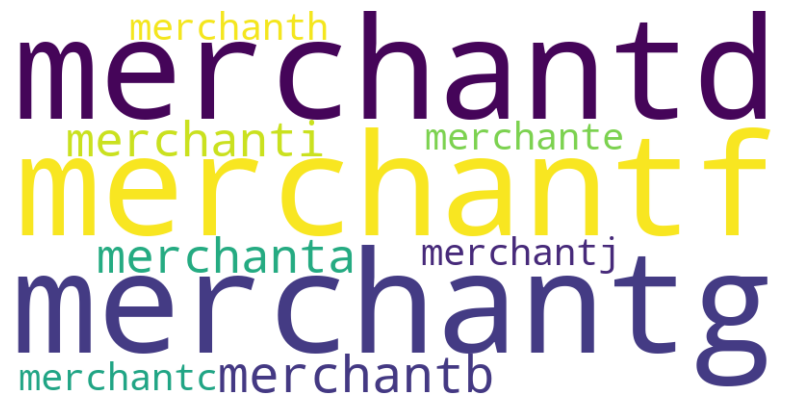

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(data):
    # Concatenate all merchant names into a single string
    text = ' '.join(data.astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_word_cloud(df['Merchant'])



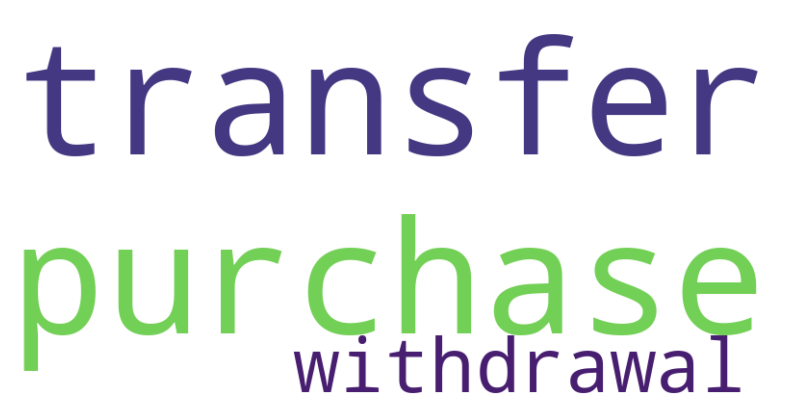

In [15]:
generate_word_cloud(df['TransactionType'])


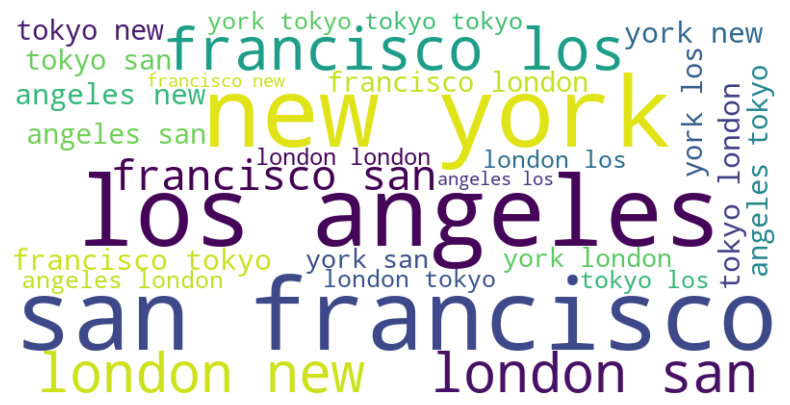

In [16]:
generate_word_cloud(df['Location'])

In [35]:
# Define the numerical columns for standardization
num_cols = ['Amount']

# Standardize numerical variables
scaler = StandardScaler()
df_imputed[num_cols] = scaler.fit_transform(df_imputed[num_cols])

# Perform PCA for feature selection
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_imputed)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_imputed['Amount'], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = torch.sigmoid(self.decoder(x))
        return x

# Instantiate the autoencoder model
input_size = X_train_tensor.shape[1]
hidden_size = max(10, input_size // 2)  # Adjust hidden size based on input variables
model = Autoencoder(input_size, hidden_size)

# Train the autoencoder model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, X_train_tensor)
    train_losses.append(train_loss.item())
    train_loss.backward()
    optimizer.step()

    # Test the model using the test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, X_test_tensor)
        test_losses.append(test_loss.item())
    
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


Epoch 1/50, Train Loss: 0.4635, Test Loss: 0.4625
Epoch 2/50, Train Loss: 0.4628, Test Loss: 0.4619
Epoch 3/50, Train Loss: 0.4622, Test Loss: 0.4612
Epoch 4/50, Train Loss: 0.4615, Test Loss: 0.4605
Epoch 5/50, Train Loss: 0.4608, Test Loss: 0.4599
Epoch 6/50, Train Loss: 0.4602, Test Loss: 0.4592
Epoch 7/50, Train Loss: 0.4595, Test Loss: 0.4586
Epoch 8/50, Train Loss: 0.4588, Test Loss: 0.4579
Epoch 9/50, Train Loss: 0.4582, Test Loss: 0.4572
Epoch 10/50, Train Loss: 0.4575, Test Loss: 0.4565
Epoch 11/50, Train Loss: 0.4568, Test Loss: 0.4559
Epoch 12/50, Train Loss: 0.4562, Test Loss: 0.4552
Epoch 13/50, Train Loss: 0.4555, Test Loss: 0.4545
Epoch 14/50, Train Loss: 0.4548, Test Loss: 0.4539
Epoch 15/50, Train Loss: 0.4541, Test Loss: 0.4532
Epoch 16/50, Train Loss: 0.4535, Test Loss: 0.4525
Epoch 17/50, Train Loss: 0.4528, Test Loss: 0.4518
Epoch 18/50, Train Loss: 0.4521, Test Loss: 0.4511
Epoch 19/50, Train Loss: 0.4514, Test Loss: 0.4505
Epoch 20/50, Train Loss: 0.4507, Test Lo

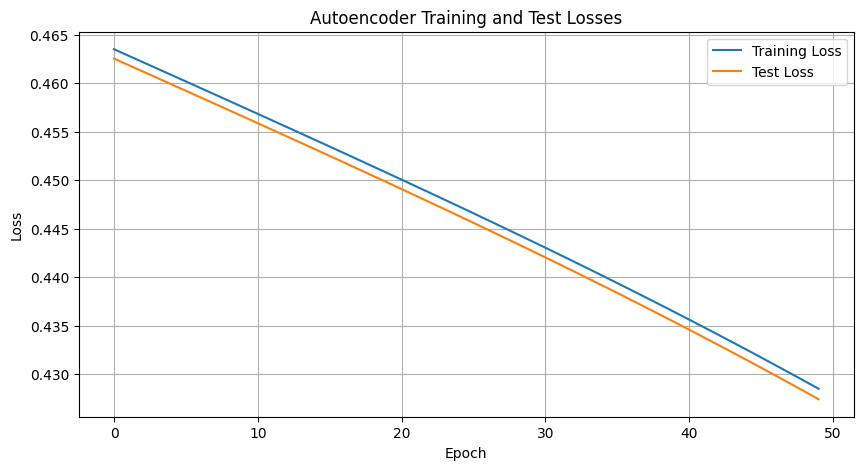

In [36]:

# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Training and Test Losses')
plt.grid(True)
plt.show()


In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

# Fit Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train_scaled)

# Predict anomalies using Isolation Forest
if_anomalies = isolation_forest.predict(X_test_scaled)
if_anomalies = np.where(if_anomalies == -1, 1, 0)

# Generate classification report for Isolation Forest
if_classification_report = classification_report(y_test, if_anomalies, target_names=['Normal', 'Fraud'])

print("One-Class SVM  Classification Report:")
print(if_classification_report)

One-Class SVM  Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.90      0.95     56867
       Fraud       0.01      0.89      0.03        95

    accuracy                           0.90     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.90      0.95     56962



In [37]:
# Set the threshold for anomaly detection (you can adjust this)
threshold = 0.01

# Define function to detect anomalies
def detect_anomalies(*args):
    # Clear previous output
    output_widget.clear_output()

    # Get input data from widgets
    input_data = [widget.value for widget in input_widgets]
    input_data_encoded = pd.DataFrame([input_data], columns=df_encoded.columns)
    input_data_numeric = input_data_encoded.drop(non_numeric_cols, axis=1)
    input_tensor = torch.tensor(input_data_numeric.values, dtype=torch.float32)

    # Calculate reconstruction error
    model.eval()
    with torch.no_grad():
        reconstructed = model(input_tensor)
        reconstruction_error = torch.mean((input_tensor - reconstructed)**2).item()

    # Display anomaly detection result
    with output_widget:
        if reconstruction_error > threshold:
            print('Anomaly Detected!')
        else:
            print('No Anomaly Detected')

# Create input widgets
input_widgets = [widgets.FloatText(description=col) for col in df_encoded.drop(non_numeric_cols, axis=1).columns]

# Create button to detect anomalies
detect_button = widgets.Button(description='Detect Anomaly')
detect_button.on_click(detect_anomalies)

# Create output widget
output_widget = widgets.Output()

# Display widgets
display(*input_widgets, detect_button, output_widget)

FloatText(value=0.0, description='Amount')

FloatText(value=0.0, description='Merchant_')

FloatText(value=0.0, description='Merchant_merchanta')

FloatText(value=0.0, description='Merchant_merchantb')

FloatText(value=0.0, description='Merchant_merchantc')

FloatText(value=0.0, description='Merchant_merchantd')

FloatText(value=0.0, description='Merchant_merchante')

FloatText(value=0.0, description='Merchant_merchantf')

FloatText(value=0.0, description='Merchant_merchantg')

FloatText(value=0.0, description='Merchant_merchanth')

FloatText(value=0.0, description='Merchant_merchanti')

FloatText(value=0.0, description='Merchant_merchantj')

FloatText(value=0.0, description='TransactionType_')

FloatText(value=0.0, description='TransactionType_purchase')

FloatText(value=0.0, description='TransactionType_transfer')

FloatText(value=0.0, description='TransactionType_withdrawal')

FloatText(value=0.0, description='Location_')

FloatText(value=0.0, description='Location_london')

FloatText(value=0.0, description='Location_los angeles')

FloatText(value=0.0, description='Location_new york')

FloatText(value=0.0, description='Location_san francisco')

FloatText(value=0.0, description='Location_tokyo')

Button(description='Detect Anomaly', style=ButtonStyle())

Output()

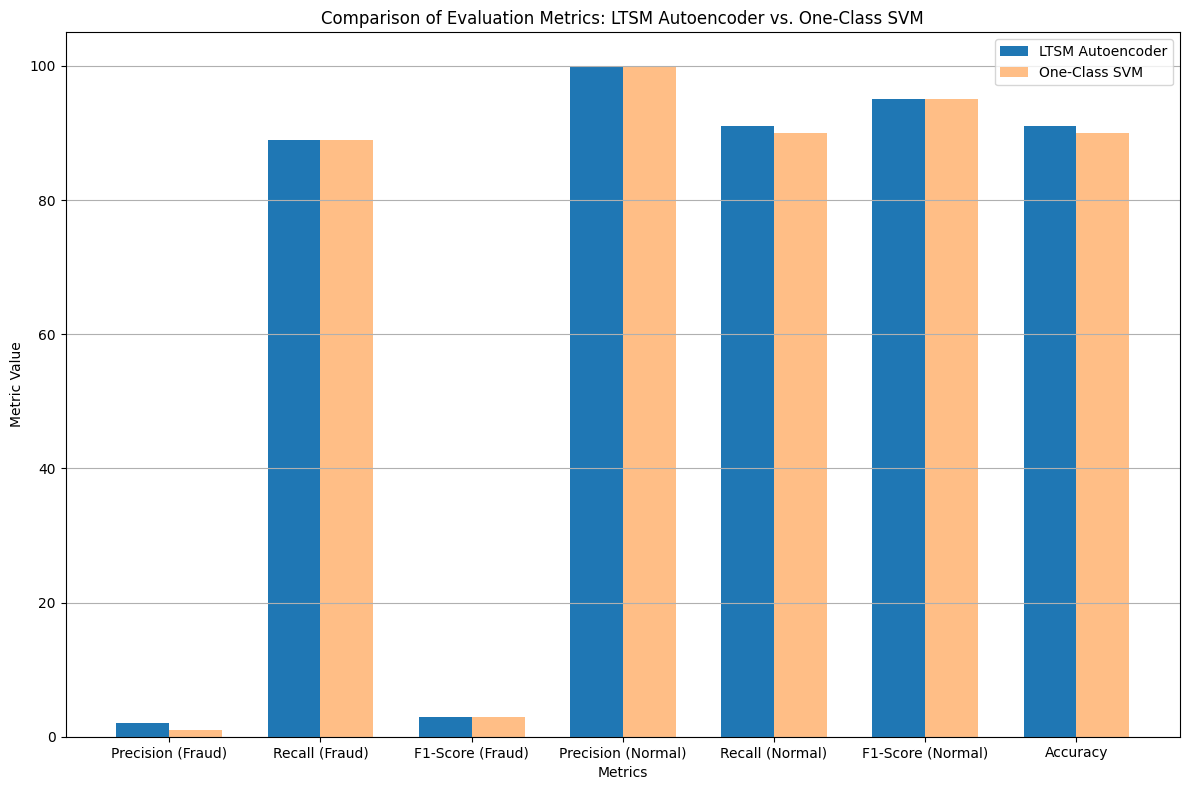

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for LTSM Autoencoder
ltsm_precision_fraud = 2
ltsm_recall_fraud = 89
ltsm_f1_fraud = 3
ltsm_precision_normal = 100
ltsm_recall_normal = 91
ltsm_f1_normal = 95
ltsm_accuracy = 91

# Evaluation metrics for One-Class SVM
svm_precision_fraud = 1
svm_recall_fraud = 89
svm_f1_fraud = 3
svm_precision_normal = 100
svm_recall_normal = 90
svm_f1_normal = 95
svm_accuracy = 90

# Define metrics and corresponding values for both models
metrics = ['Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)', 'Precision (Normal)', 'Recall (Normal)', 'F1-Score (Normal)', 'Accuracy']
ltsm_values = [ltsm_precision_fraud, ltsm_recall_fraud, ltsm_f1_fraud, ltsm_precision_normal, ltsm_recall_normal, ltsm_f1_normal, ltsm_accuracy]
svm_values = [svm_precision_fraud, svm_recall_fraud, svm_f1_fraud, svm_precision_normal, svm_recall_normal, svm_f1_normal, svm_accuracy]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(metrics))

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(index, ltsm_values, width=bar_width, label='LTSM Autoencoder')
plt.bar(index + bar_width, svm_values, width=bar_width, alpha=0.5, label='One-Class SVM')

# Add gridlines
plt.grid(axis='y')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Metric Value')
plt.title('Comparison of Evaluation Metrics: LTSM Autoencoder vs. One-Class SVM')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
